In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/Daniel Lara/Downloads/2008.csv", nrows = 1e6)

se comparan las sumas de diferencias al cuadrado de lo que estamos observando(datos reales) y los esperados con aquellos que no se esperan una relacion esto permite cuantificar la magnitus entre estas distancias cuantificarlas con la distribucion de Xi^2 y decidir si podemos afirmar que estas variables estan correlacionadas significativamente

debilidades : no permite cuantificar cada una de las variables pero si da una afirmacion global 

In [20]:
np.random.seed(0) # cuando se quiera replicar el codigo se va a obtener los mismos resultados
df = df[df["Origin"].isin(["HOU","ATL","IND"])] #solo vuelos que provengan de estos 
df = df.sample(frac=1)
df = df[0:10000] #un test con muchas filas no tiene sentido

In [21]:
# se esta cogiendo dos columnas para ver su relacion
df["BigDelay"] = df["ArrDelay"] > 30
observados = pd.crosstab(index = df["BigDelay"], columns = df["Origin"], margins = True)

In [22]:
# el 6818 significa los vuelos que se retrasaron menos de 30min desde atlanta igual
observados

Origin,ATL,HOU,IND,All
BigDelay,,,,
False,6818,1080,641,8539
True,1143,201,117,1461
All,7961,1281,758,10000


In [23]:
from scipy.stats import chi2_contingency

In [24]:
test = chi2_contingency(observados)

In [25]:
# el primero es la suma de las diferencias al cuadrado el segundo es el p.value 
#luego esta la tabla de valores esperados
test

(2.0203704019430053,
 0.9178156315824011,
 6,
 array([[ 6797.8979,  1093.8459,   647.2562,  8539.    ],
        [ 1163.1021,   187.1541,   110.7438,  1461.    ],
        [ 7961.    ,  1281.    ,   758.    , 10000.    ]]))

In [26]:
esperados = pd.DataFrame(test[3])

In [27]:
esperados

,0,1,2,3
0,6797.8979,1093.8459,647.2562,8539.0
1,1163.1021,187.1541,110.7438,1461.0
2,7961.0000,1281.0000,758.0000,10000.0


In [28]:
esperados_rel = round(esperados.apply(lambda r: r/len(df)*100,axis=1),2)

In [29]:
observados_rel = round(observados.apply(lambda r: r/len(df)*100,axis=1),2)

In [30]:
esperados_rel

,0,1,2,3
0,67.98,10.94,6.47,85.39
1,11.63,1.87,1.11,14.61
2,79.61,12.81,7.58,100.00


In [31]:
observados_rel

Origin,ATL,HOU,IND,All
BigDelay,,,,
False,68.18,10.80,6.41,85.39
True,11.43,2.01,1.17,14.61
All,79.61,12.81,7.58,100.00


In [32]:
test[1]

0.9178156315824011

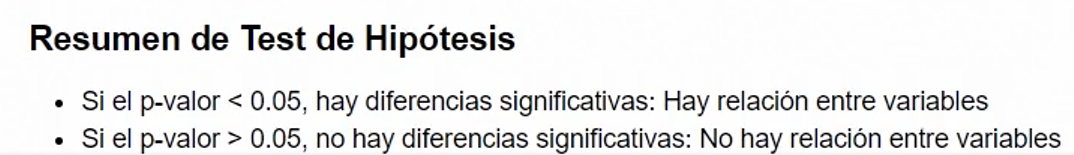